In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

directory = "../input/"
print(os.listdir(directory))
os.getcwd()
# Any results you write to the current directory are saved as output.

['zillow_data_dictionary.xlsx', 'properties_2016.csv', 'sample_submission.csv', 'train_2017.csv', 'train_2016_v2.csv', 'properties_2017.csv']


'/kaggle/working'

In [4]:
dfs = pd.read_excel(directory + "zillow_data_dictionary.xlsx", sheet_name=None)
dfs['Data Dictionary'].sort_values(by="Feature")

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
55,'assessmentyear',The year of the property tax assessment
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
11,'calculatedfinishedsquarefeet',Calculated total finished living area of the ...


### Loading Training Data: Housing ID and Logerror 

In [5]:
train17 = pd.read_csv(directory + "train_2017.csv")
train17.head(5)

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


### Loading House Property Data

In [6]:
prop17=pd.read_csv(directory + "properties_2017.csv")
prop17.head(5)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,1959.0,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


### Merge the Training data with House Property Data

In [7]:
df17 = pd.merge(train17, prop17, on=["parcelid"], how="left", indicator = True)

In [8]:
print("Dataset Size is %d "%(df17.shape[0]))

Dataset Size is 77613 


In [9]:
'''
Function to display Dataset Propety
'''
def DisplayT(DF, target_feature):
    counts=DF.count()
    nulls=DF.apply(lambda col: col.isnull().sum())
    pct_nulls = np.round(nulls / DF.shape[0],5)
    uniques=DF.apply(lambda col: [col.unique()])
#    count_uniques = DF.apply(lambda col: len([col.unique()]))
    count_uniques=[len(lst) for lst in uniques.iloc[0,:].values]

    dtypes=DF.dtypes
    #tbl=pd.DataFrame(list(zip(uniques.iloc[0,:].values)), columns=["uniqueness"])
    
    tbl=pd.DataFrame(list(zip(DF.columns,counts, nulls,pct_nulls*100 ,dtypes, uniques.iloc[0,:].values,count_uniques,  DF.corr()[target_feature])), 
                     columns=["feature","non_empty_counts","nulls","pct_nulls","dtypes", "uniqueness", "count_unique","corr_betweem_target" ])
    tbl=tbl.set_index("feature")
    return(tbl)

### This dataset contains 54 features with with 77613 instances.
#### The following shows some information about the features
- non_empty_counts: Number of Non-empty Cells of the specific feature
- nulls: Number of Null cells of the specific feature
- pct_nulls: Percent of null cells of the specific feature
- dtype: Type of the feature
- uniqueness: Sample of unique values of the specific feature
- count_unique: Number of unique values of the specific feature
- corr_betweem_target: Correlation value between the feature and Target Value

In [10]:
adf=DisplayT(df17, "logerror")
print(adf.shape)
display(adf.sort_values(by="nulls", ascending = False))

(54, 7)


,non_empty_counts,nulls,pct_nulls,dtypes,uniqueness,count_unique,corr_betweem_target
feature,,,,,,,
buildingclasstypeid,15,77598,99.981,float64,"[nan, 4.0, 3.0]",3,-0.012987
finishedsquarefeet13,42,77571,99.946,float64,"[nan, 1440.0, 1344.0, 1152.0, 1536.0, 1392.0, ...",14,-0.041200
storytypeid,50,77563,99.936,float64,"[nan, 7.0]",2,-0.039753
basementsqft,50,77563,99.936,float64,"[nan, 900.0, 1416.0, 224.0, 100.0, 512.0, 380....",44,0.025817
yardbuildingsqft26,70,77543,99.910,float64,"[nan, 196.0, 300.0, 56.0, 88.0, 120.0, 160.0, ...",60,0.003419
fireplaceflag,172,77441,99.778,object,"[nan, True]",2,0.002199
architecturalstyletypeid,207,77406,99.733,float64,"[nan, 7.0, 8.0, 21.0, 3.0, 2.0]",6,0.372067
typeconstructiontypeid,223,77390,99.713,float64,"[nan, 6.0, 13.0, 10.0, 4.0]",5,0.004861
finishedsquarefeet6,386,77227,99.503,float64,"[nan, 2482.0, 624.0, 4198.0, 5041.0, 1482.0, 7...",351,0.006413


### Missing Values
#### There are quite amount of missing values in some of the features, the following features with over 50% of missing are going to exclude from the dataset

In [11]:
display(adf[["pct_nulls", "dtypes"]][adf.pct_nulls>50].sort_values(by="pct_nulls", ascending = False))

,pct_nulls,dtypes
feature,,
buildingclasstypeid,99.981,float64
finishedsquarefeet13,99.946,float64
basementsqft,99.936,float64
storytypeid,99.936,float64
yardbuildingsqft26,99.910,float64
fireplaceflag,99.778,object
architecturalstyletypeid,99.733,float64
typeconstructiontypeid,99.713,float64
finishedsquarefeet6,99.503,float64


#### The following features (<50% Missing) is going to be stayed for further analysis

In [12]:
display(adf[["pct_nulls", "dtypes"]][adf.pct_nulls<=50].sort_values(by="pct_nulls", ascending = False))

,pct_nulls,dtypes
feature,,
heatingorsystemtypeid,36.131,float64
buildingqualitytypeid,35.824,float64
propertyzoningdesc,34.965,object
unitcnt,34.672,float64
lotsizesquarefeet,10.684,float64
finishedsquarefeet12,4.754,float64
regionidcity,1.940,float64
calculatedbathnbr,0.837,float64
fullbathcnt,0.837,float64


### Correlation on "float" features

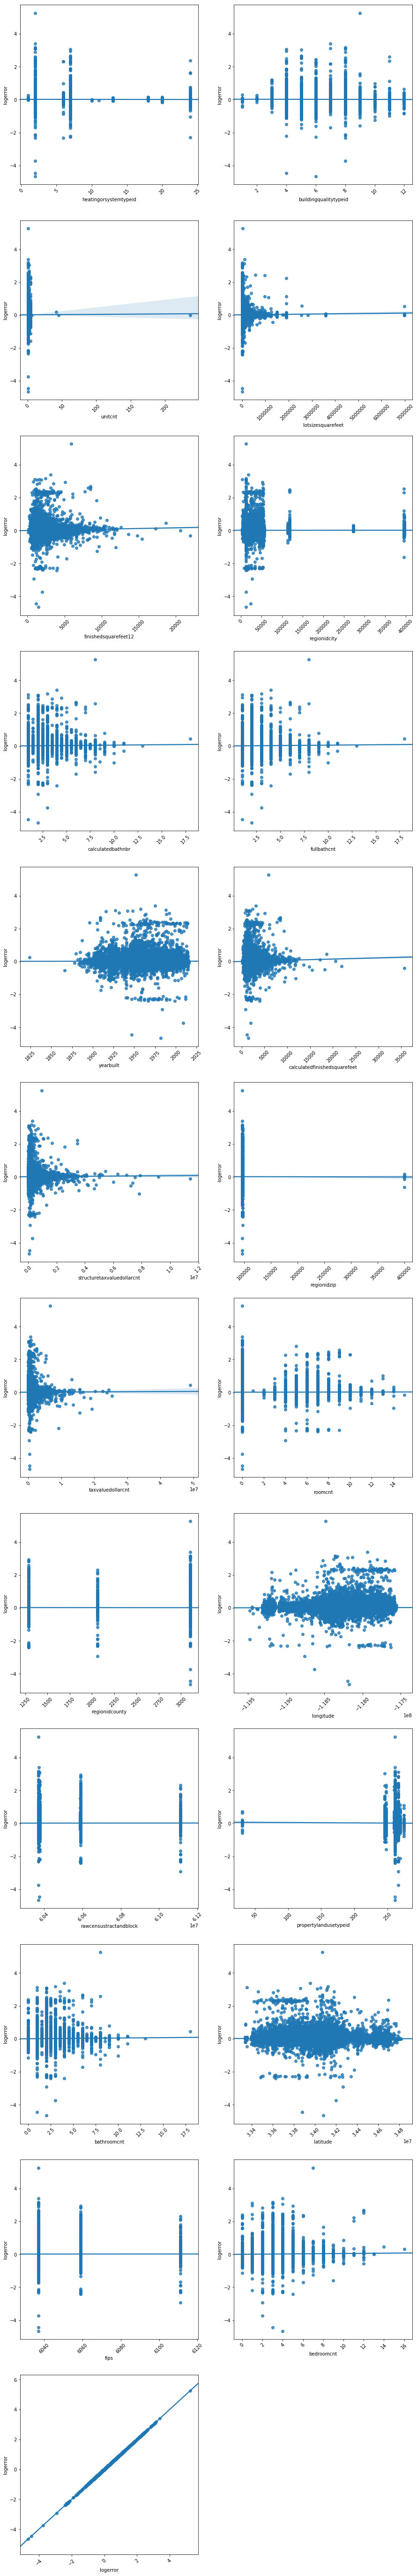

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

features=adf[["pct_nulls", "dtypes"]][adf.pct_nulls<=50][adf["dtypes"] == "float64"].sort_values(by="pct_nulls", ascending = False).index

'''
Plotting Correlation 
'''
def plotCorr(DF,features,Target_Var,number_of_columns, width_of_plot, depth_of_plot):
    c=number_of_columns
    w=round(len(features)/c) 

    fig = plt.figure(figsize=(width_of_plot,depth_of_plot))
    cnt=0
    for row in range(w):
        for col in range(0,2):

            try:
                features[cnt]
                plt.subplot2grid((w,c),(row,col))
                sns.regplot(x=features[cnt], y=Target_Var, data=DF)
                plt.xticks(rotation=45)
                cnt+=1
            except:
                cnt+=1
                pass

plotCorr(df17, features,"logerror", 2,15,100)